# Conceitos envolvidos

# üìå Conceitos Matem√°ticos para Implementa√ß√£o do GerOndApp

## üìå 1. S√©ries Temporais e Fun√ß√µes Peri√≥dicas

- **Fun√ß√µes para plotar**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
###### FUN√á√ÉO PARA PLOTAR 1 S√âRIE EM GR√ÅFICO

def plotar(sinal, periodo, nome):
    plt.figure(figsize = (10,3))
    plt.plot(periodo,sinal)
    plt.title(nome)
    plt.xlabel('Tempo(s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

#FUN√á√ÉO PARA PLOTAR N S√âRIES COM SUAS RESPECTIVAS LEGENDAS EM UM S√ì GR√ÅFICO

def plotar_sinais(vetorTempo, *sinais, labels = None, titulo):

    plt.figure(figsize=(10,5))

    #Cria legendas aleat√≥rias caso nenhuma for informada
    if labels is None:
        labels = [f"Sinal {i+1}" for i in range(len(sinais))]

    #Plota cada sinal com sua respectiva legenda
    for i, sinal in enumerate(sinais):
        plt.plot(vetorTempo, sinal, label = labels[i])

    #Configura restante das infos
    plt.legend()
    plt.xlabel("Tempo (s)")
    plt.ylabel("Amplitude")
    plt.title(titulo)
    plt.grid()
    plt.show()


#FUN√á√ÉO PARA PLOTAR S√âRIES EM SEUS GR√ÅFICOS DE UMA S√ì VEZ

def subplotar(sinal, t, nome, qtd_sinais, posicao):
    plt.figure(figsize = (10,5))
    plt.subplot (qtd_sinais, 1, posicao)
    plt.plot(t, sinal, label = nome)
    plt.title(nome)
    plt.grid()


#FUN√á√ÉO PARA PLOTAR 4 SINAIS 2x2

def plotar_2x2(sinal1, sinal2, sinal3, sinal4, t, labels=None):
    # Cria legendas caso nenhuma for informada
    if labels is None:
        labels = [f"Sinal {i+1}" for i in range(4)]  # Corrigido para 4 sinais

    # Criar os subplots (2 linhas, 2 colunas)
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))

    # Adicionar os sinais aos subplots
    axs[0, 0].plot(t, sinal1, label=labels[0], color = 'blue')
    axs[0, 0].set_title(labels[0])

    axs[0, 1].plot(t, sinal2, label=labels[1], color = 'yellow')
    axs[0, 1].set_title(labels[1])

    axs[1, 0].plot(t, sinal3, label=labels[2], color = 'green')
    axs[1, 0].set_title(labels[2])

    axs[1, 1].plot(t, sinal4, label=labels[3], color = 'red')
    axs[1, 1].set_title(labels[3])

    # Melhorar a apresenta√ß√£o dos gr√°ficos
    for ax in axs.flat:
        ax.set_xlabel("Tempo (s)")
        ax.set_ylabel("Amplitude")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


    Iremos criar um vetor de instantes no tempo para podermos criar e visualizar os sinais

In [ ]:
vetorTempo = np.linspace(0,1,1000)  #1 vetor de 1000 milisegundos (1 seg / 1000 pontos)

### üîπ 1.1 Fun√ß√µes Peri√≥dicas
- **Onda Senoidal**:  

    Onda peri√≥dica descrita pela fun√ß√£o seno:
  
$x(t) = A \cdot sen(2 \pi f t + \phi)$

Onde  $\phi$  √© o deslocamento no eixo x tamb√©m chamado de fase, **f** √© a frequencia e **t** √© o instante no tempo.
  

In [ ]:
 def onda_senoidal(amplitude, frequencia, t, fase):
    return amplitude * np.sin(2*np.pi*frequencia*t + fase)

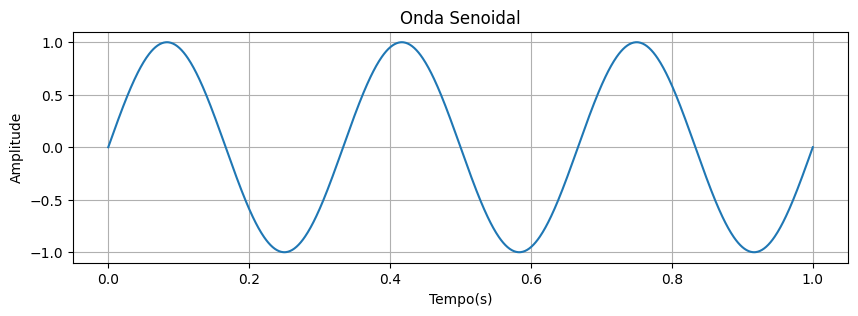

In [ ]:
x_senoidal = onda_senoidal(amplitude = 1, frequencia = 3, t = vetorTempo, fase = 0)

plotar(x_senoidal, vetorTempo, 'Onda Senoidal')

- **Onda Triangular**: Definida por partes (fun√ß√£o linear crescente e decrescente).  

    A onda triangular √© um tipo de onda peri√≥dica que tem um formato em zigue-zague, alternando entre valores m√°ximos e m√≠nimos de forma linear. Ela √© chamada assim porque seu formato lembra uma sequ√™ncia de tri√¢ngulos.

    Sua forma matem√°tica √©:

$x(t) = \frac{4A}{T} \left( \left( \left( t - \frac{T}{4} \right) \mod T - \frac{T}{2} \right) - \frac{T}{4} \right)$

    Por√©m, a fim de facilitar, usamos o m√©todo sawtooth da biblioteca Scipy.

$x(t) = A \cdot \text{sawtooth}(2\pi f t, 0.5)$

3Ô∏è‚É£ **Caracter√≠sticas Principais:**

‚úÖ Forma geom√©trica ‚Üí Alterna linearmente entre valores m√°ximos e m√≠nimos.

‚úÖ Simetria ‚Üí Diferente da onda dente de serra, que sobe rapidamente e desce lentamente, a onda triangular sobe e desce na mesma taxa.

‚úÖ Frequ√™ncia (f) ‚Üí Determina quantos ciclos ocorrem por segundo.

‚úÖ Amplitude (A) ‚Üí Define a altura m√°xima da onda.

‚úÖ Per√≠odo (ùëá) ‚Üí Tempo necess√°rio para completar um ciclo.

‚úÖ Harm√¥nicos ‚Üí Cont√©m apenas harm√¥nicos √≠mpares, semelhante √† onda quadrada, mas com decaimento mais r√°pido (1/ùëõ^2).

In [ ]:
#EXEMPLO EM PYTHON

def onda_triangular(amplitude, frequencia, t, simetria):
    return amplitude * sawtooth (2*np.pi*frequencia*t, simetria)

from scipy.signal import sawtooth

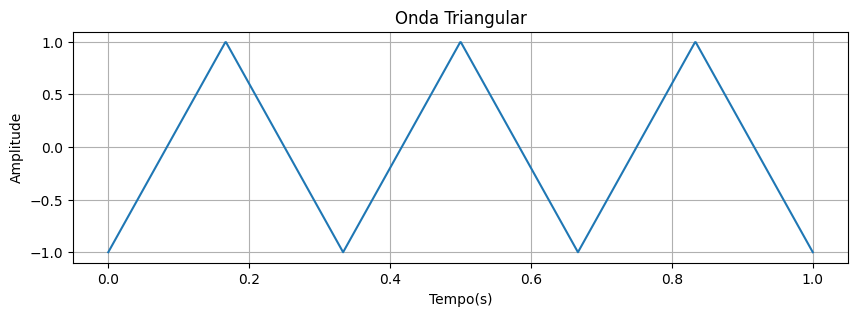

In [ ]:
x_triang = onda_triangular(amplitude = 1, frequencia = 3, t = vetorTempo, simetria = 0.5)

plotar(x_triang, vetorTempo, 'Onda Triangular')

- **Onda Quadrada**: Fun√ß√£o que alterna entre dois valores, definida por Duty Cycle.

    A onda quadrada √© um tipo de onda peri√≥dica que alterna entre dois valores fixos, m√°ximo (+ùê¥) e m√≠nimo (‚àíA), em intervalos de tempo regulares. Diferente da onda senoidal e triangular, a onda quadrada n√£o tem transi√ß√µes suaves, mudando bruscamente entre os dois n√≠veis.

**Equa√ß√£o Matem√°tica:**
    A onda quadrada pode ser definida como:

$x(t) =\begin{cases} A, & \text{se } 0 \leq t \mod T < D \cdot T \\- A, & \text{se } D \cdot T \leq t \mod T < T\end{cases}$

    Onde D √© o Duty Cycle (Propor√ß√£o de tempo que a onda est√° no n√≠vel m√°ximo.
    Tamb√©m pode ser representada usando a fun√ß√£o square da biblioteca SciPy

$x(t)= A \cdot square(2 \cdot \pi \cdot f \cdot t, duty)$


    Tamb√©m pode ser representada usando a fun√ß√£o square da biblioteca SciPy

$x(t)= A \cdot square(2 \cdot \pi \cdot f \cdot t, duty)$

3Ô∏è‚É£ **Caracter√≠sticas Principais**

‚úÖ Altern√¢ncia brusca ‚Üí A onda quadrada muda entre dois valores sem transi√ß√µes suaves.

‚úÖ Duty Cycle (ùê∑) ‚Üí Indica a porcentagem do tempo que a onda permanece em +ùê¥ dentro de um ciclo:ùê∑= (Tempo¬†em¬†n√≠vel alto /ùëá)√ó100%

‚úÖ Per√≠odo (T) ‚Üí Tempo necess√°rio para completar um ciclo completo:

‚úÖ Harm√¥nicos ‚Üí Cont√©m somente harm√¥nicos √≠mpares (ùëì,3ùëì,ùëì,...f,3f,5f,...), decaindo proporcionalmente a 1/ùëõ.



In [ ]:
from scipy.signal import square

def onda_quadrada(amplitude, frequencia, t, duty):
    return amplitude * square(2*np.pi*frequencia*t, duty = duty)

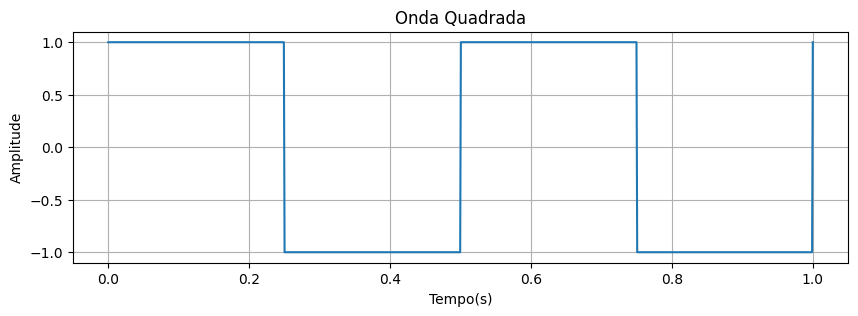

In [ ]:
x_quad = onda_quadrada(amplitude = 1, frequencia = 2, t = vetorTempo, duty = 0.5)

plotar(x_quad, vetorTempo, 'Onda Quadrada')

### üîπ 1.2 Ru√≠do Branco
- Sinal aleat√≥rio sem periodicidade bem definida.
- Pode ser gerado com distribui√ß√£o **Gaussiana (normal)** ou **Uniforme**.
- Ru√≠do branco √© um tipo de sinal aleat√≥rio com uma densidade espectral de pot√™ncia constante em todas as frequ√™ncias, ou seja, possui uma distribui√ß√£o de energia uniforme ao longo do espectro de frequ√™ncias. Essa caracter√≠stica faz com que o ru√≠do branco seja, de certa forma, "imprediz√≠vel", com componentes de alta e baixa frequ√™ncia que ocorrem de forma aleat√≥ria.
- Em uma abordagem de sinais, o ru√≠do branco pode ser visto como uma sequ√™ncia de amostras de uma vari√°vel aleat√≥ria com distribui√ß√£o de probabilidade uniforme ou normal, dependendo do tipo de ru√≠do branco que estamos simulando. O "branco" faz refer√™ncia ao fato de que ele possui uma ampla gama de frequ√™ncias, muito parecido com a luz branca, que √© composta por todas as cores vis√≠veis.


- **Principais caracter√≠sticas**

  **Estacionaridade:** Em m√©dia, as propriedades estat√≠sticas do ru√≠do branco n√£o mudam ao longo do tempo. Isso significa que a m√©dia e a vari√¢ncia do sinal permanecem constantes.
      
  **Autocorrela√ß√£o:** A autocorrela√ß√£o do ru√≠do branco √© uma fun√ß√£o delta de Dirac, ou seja, em qualquer ponto do tempo, o sinal n√£o tem correla√ß√£o com os valores em outros tempos (fora do intervalo infinitesimal).

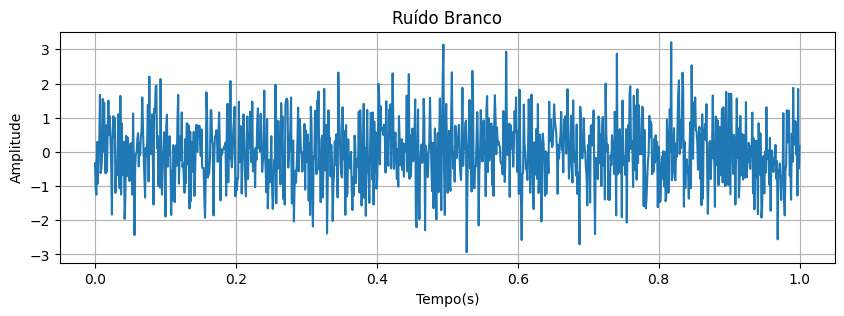

In [ ]:
n_amostras = 1000
f_amostra = 1000 #Frequencia da amostra em Hertz

ruidoBranco = np.random.randn(n_amostras)

plotar(ruidoBranco, vetorTempo, 'Ru√≠do Branco')


---

## üìå 2. Opera√ß√µes Matem√°ticas com Sinais

- **Soma e Subtra√ß√£o de sinais**  


$x(t) = x1 + x2 + ruido\ branco$


<Figure size 1200x1000 with 0 Axes>

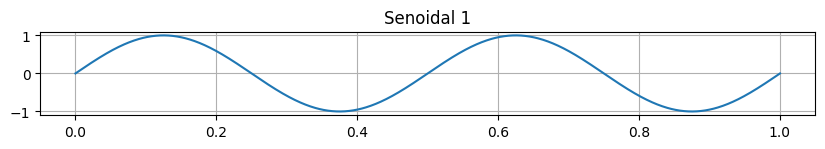

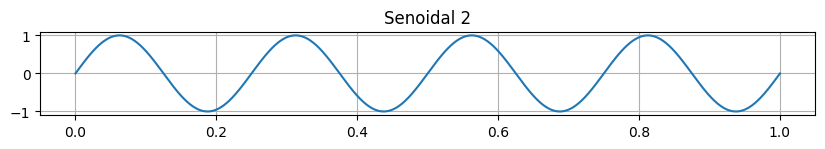

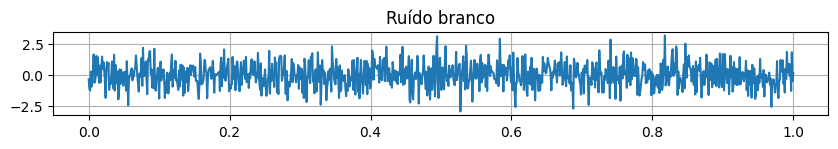

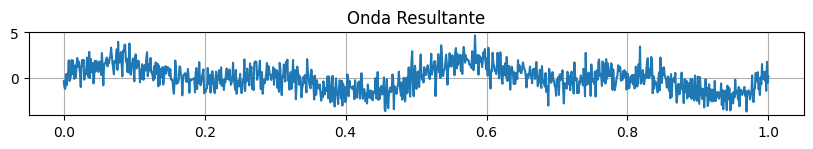

In [ ]:
senoide1 = onda_senoidal(amplitude = 1, frequencia = 2, t = vetorTempo, fase = 0)
senoide2 = onda_senoidal(amplitude = 1, frequencia = 4, t = vetorTempo, fase = 0)

onda_res = senoide1 + senoide2 + ruidoBranco

#PLOTANDO

plt.figure(figsize=(12, 10))

subplotar(senoide1, vetorTempo, 'Senoidal 1', 4, 1)
subplotar(senoide2, vetorTempo, 'Senoidal 2', 4, 2)
subplotar(ruidoBranco, vetorTempo, 'Ru√≠do branco', 4, 3)
subplotar(onda_res, vetorTempo, 'Onda Resultante', 4, 4)


-  **Interfer√™ncia Destrutiva**

   Somando dois sinais de mesma amplitude e frequ√™ncia, mas de fases opostas, o sinal resultante ser√° o nulo.

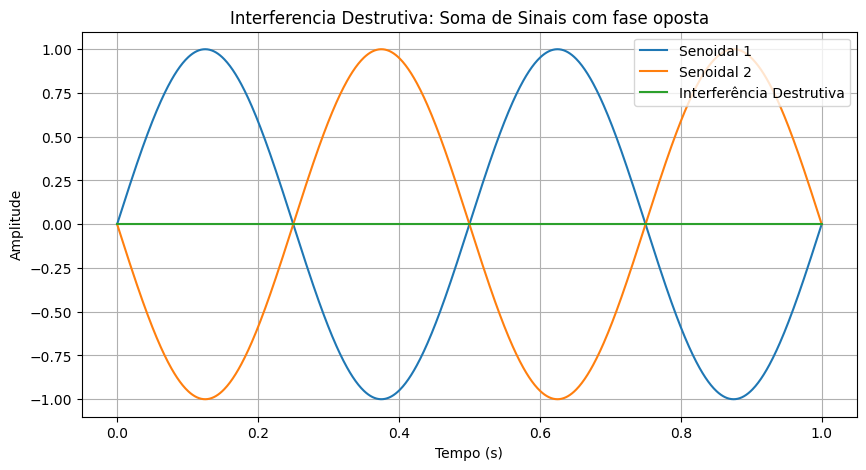

In [ ]:
senoidal1 = onda_senoidal(amplitude = 1, frequencia = 2, t = vetorTempo, fase = 0.0)
senoidal2 = onda_senoidal(amplitude = 1, frequencia = 2, t = vetorTempo, fase = np.pi) #Fase Oposta a de cima

interferenciaDestrutiva = senoidal1 + senoidal2

#Plotando

plotar_sinais(vetorTempo, senoidal1, senoidal2, interferenciaDestrutiva,
              labels = ['Senoidal 1', 'Senoidal 2', 'Interfer√™ncia Destrutiva'],
              titulo = 'Interferencia Destrutiva: Soma de Sinais com fase oposta')

## **Multiplica√ß√£o e Divis√£o de sinais**
   ### **Multiplica√ß√£o de ondas senoidais (modula√ß√£o)**

Ao multiplicarmos duas ondas de frenquencia f1 e f2, temos:

    sinalSaida = A¬π. sen(2.pi.f1.t) . A¬≤ . sen(2.pi.f2.t)

Agora iremos aplicar a identidade geom√©trica:

    sen(A)*sen(B) = 1/2 ((cos(A - B) - (cos(A+B))

    sen(f1)*sen(f2) = 1/2 ((cos(f1 - f2) - (cos(f1 + f2))

Surgem ent√£o mais 2 novos componentes de frenqu√™ncia, (f1 - f2) e (f1 + f2)

Essa opera√ß√£o √© usada em modula√ß√£o AM e heter√≥dinos (mudan√ßa de frequ√™ncia em sistemas de r√°dio).


    

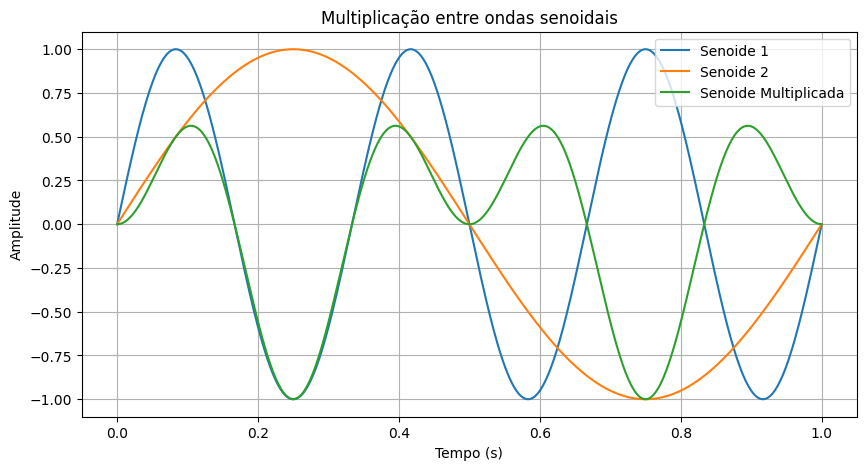

In [ ]:
s1 = onda_senoidal(amplitude = 1, frequencia = 3, t = vetorTempo, fase = 0)
s2 = onda_senoidal(amplitude = 1, frequencia = 1, t = vetorTempo, fase = 0)

senoide_multiplicada = s1 * s2


#Plotando

plotar_sinais(vetorTempo, s1, s2, senoide_multiplicada,
             labels = ['Senoide 1', 'Senoide 2', 'Senoide Multiplicada'],
             titulo = 'Multiplica√ß√£o entre ondas senoidais')

![image.png](attachment:9a069f00-f741-4f50-8283-5f96102ca0c8.png)

### **Multiplica√ß√£o de senoidal com quadrada**

    Multiplicar uma onda senoidal por uma onda quadrada alterna a sen√≥ide entre seus valores positivos e negativos, resultando em uma forma de onda segmentada. Isso √© √∫til para chaves eletr√¥nicas e sistemas de modula√ß√£o digital.

- Quando a onda quadrada est√° positiva (+1), a senoide mant√©m sua forma original.
- Quando a onda quadrada est√° negativa (-1), a senoide √© invertida (espelhada no eixo horizontal).
- Se a onda quadrada fosse um trem de pulsos (0 e 1), a senoide seria "ligada" e "desligada" em diferentes momentos.

**Aplica√ß√µes:**

- Modula√ß√£o AM (Amplitude Modulation)
- Gera√ß√£o de sinais pulsados em eletr√¥nica

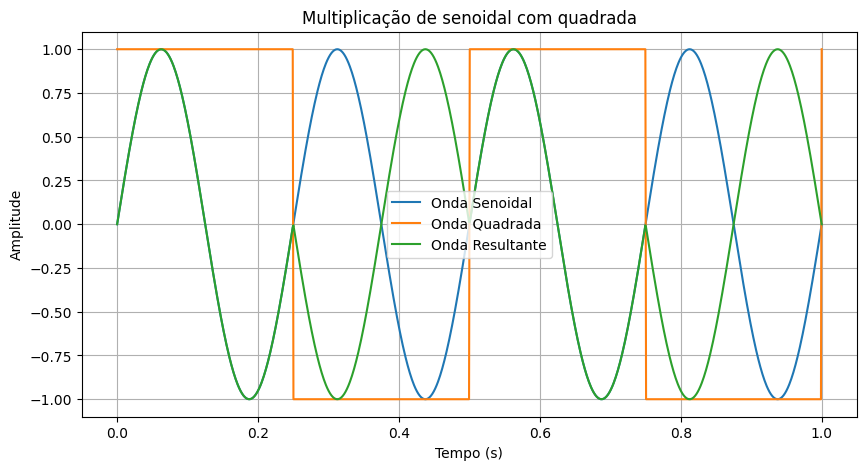

In [ ]:
senoide1 = onda_senoidal(amplitude = 1, frequencia = 4, t = vetorTempo, fase = 0)
quadrada1 = onda_quadrada(amplitude = 1, frequencia = 2, t = vetorTempo, duty = 0.5)

onda_resultante = senoide1 * quadrada1

#Plotandob

plotar_sinais(vetorTempo, senoide1, quadrada1, onda_resultante,
             labels = ['Onda Senoidal', 'Onda Quadrada', 'Onda Resultante'],
             titulo = 'Multiplica√ß√£o de senoidal com quadrada')

### Sinal Quadrado X Sinal Triangular

- A onda triangular ser√° invertida periodicamente, como no caso da senoide.
- Isso gera um sinal serrilhado, √∫til para sintetizadores de √°udio.

**Aplica√ß√µes:**

- Gera√ß√£o de formas de onda para circuitos osciladores
- Modula√ß√£o de sinais em √°udio digital

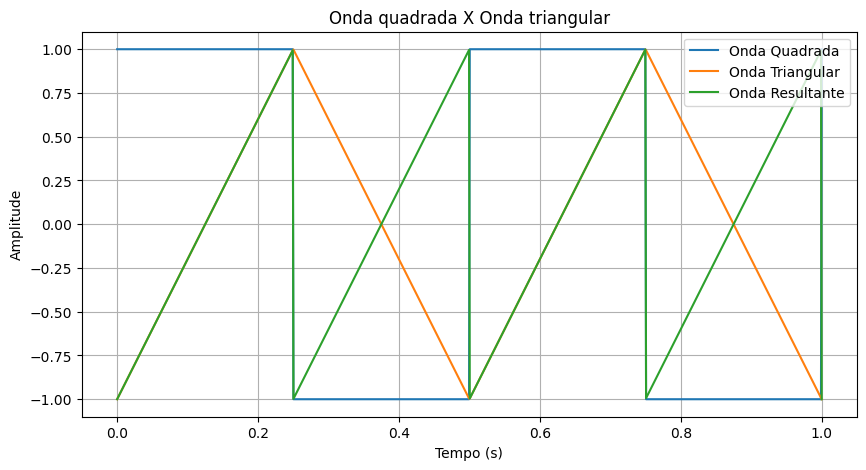

In [ ]:
s_quadrado = onda_quadrada(amplitude = 1, frequencia = 2, t = vetorTempo, duty = 0.5)
s_triang = onda_triangular(amplitude = 1, frequencia = 2, t = vetorTempo, simetria = 0.5)

s_result = s_quadrado * s_triang

#Plotando

plotar_sinais(vetorTempo, s_quadrado, s_triang, s_result,
             labels = ['Onda Quadrada','Onda Triangular','Onda Resultante'],
             titulo = 'Onda quadrada X Onda triangular')




### Sinal Quadrado X Ru√≠do Branco

- O ru√≠do branco √© um sinal aleat√≥rio. Multiplic√°-lo por uma onda quadrada resulta em janelas de ru√≠do, onde o ru√≠do aparece e desaparece periodicamente.
- Se a onda quadrada for assim√©trica (duty cycle ‚â† 50%), o ru√≠do ser√° distribu√≠do irregularmente.

**Aplica√ß√µes:**

- S√≠ntese de som para criar efeitos como "chopping noise"
- Controle de ru√≠do em telecomunica√ß√µes

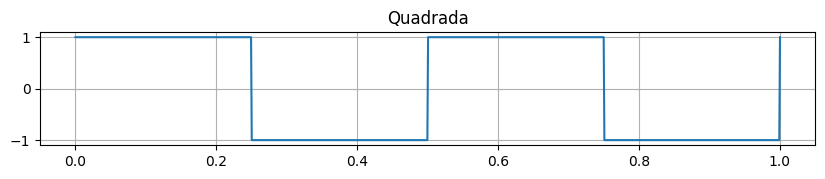

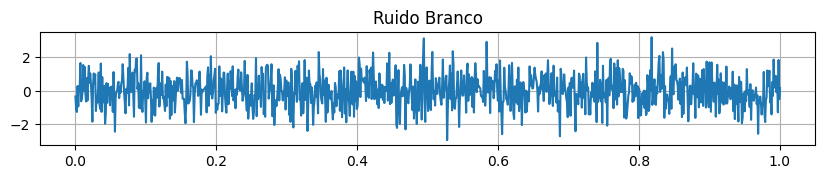

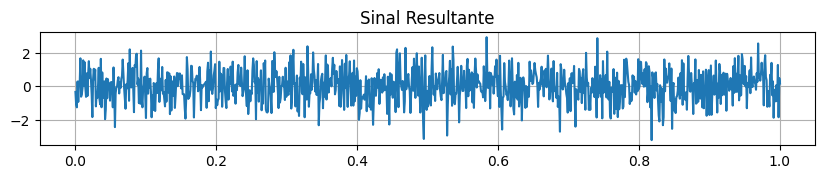

In [ ]:
resultado = quadrada1 * ruidoBranco

subplotar(quadrada1, vetorTempo, 'Quadrada', 3, 1)
subplotar(ruidoBranco, vetorTempo, 'Ruido Branco', 3, 2)
subplotar(resultado, vetorTempo, 'Sinal Resultante', 3, 3)

### Multiplica√ß√£o entre sinais


### Onda Triangular X Onda senoidal

- O resultado √© uma senoide cuja amplitude cresce e decresce lentamente, criando um efeito de tremula√ß√£o (tremolo).
- Muito usado em s√≠ntese de √°udio para criar modula√ß√£o de amplitude lenta.

**Aplica√ß√µes:**

- Modula√ß√£o tremolo em √°udio
- Controle gradual de amplitude em telecomunica√ß√µes

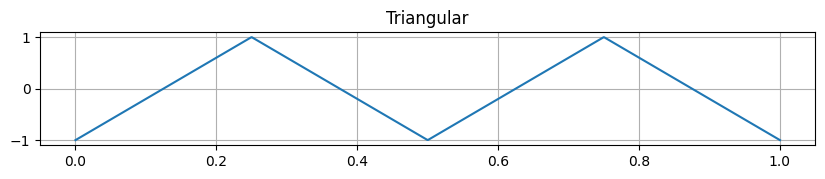

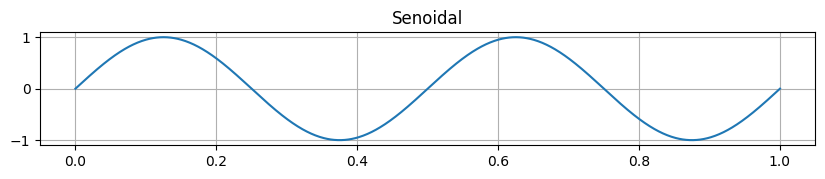

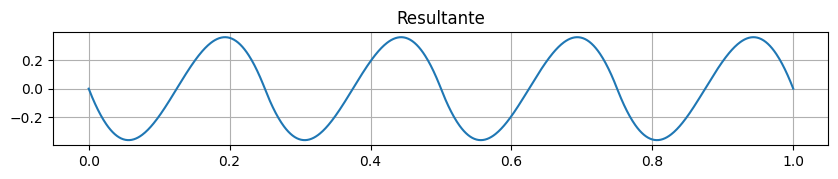

In [ ]:
resultado = s_triang * senoidal1

subplotar(s_triang, vetorTempo, 'Triangular', 3, 1)
subplotar(senoidal1, vetorTempo, 'Senoidal', 3, 2)
subplotar(resultado, vetorTempo, 'Resultante', 3, 3)

### Onda Triangular X Ru√≠do Branco

- O ru√≠do branco ser√° suavemente modulado pela onda triangular, criando um efeito de fading (o ru√≠do aumenta e diminui lentamente).
- Ao contr√°rio da onda quadrada, que "liga e desliga" o ru√≠do abruptamente, a onda triangular cria uma transi√ß√£o gradual.

**Aplica√ß√µes:**

- S√≠ntese de som ambiental e espacializa√ß√£o de √°udio
- Modelagem de ru√≠do em comunica√ß√µes sem fio

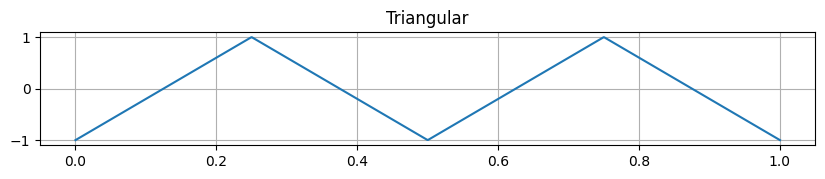

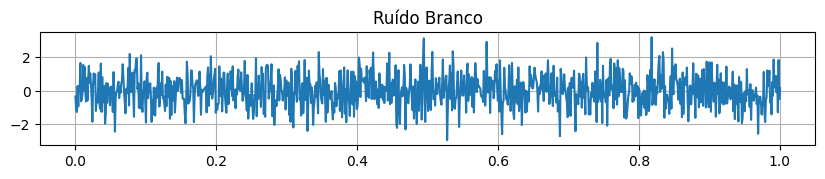

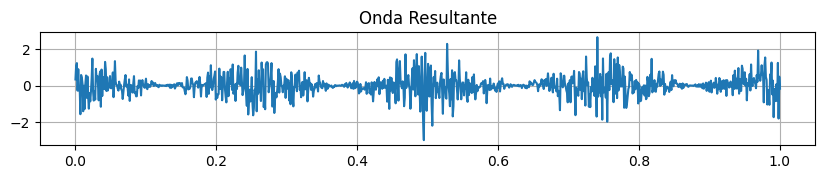

In [ ]:
resultado = s_triang * ruidoBranco

subplotar(s_triang, vetorTempo, 'Triangular', 3, 1)
subplotar(ruidoBranco, vetorTempo, 'Ru√≠do Branco', 3, 2)
subplotar(resultado, vetorTempo, 'Onda Resultante', 3, 3)

### Ru√≠do Branco X Outros sinais

- O ru√≠do branco adiciona varia√ß√µes aleat√≥rias aos sinais, √∫til para criar texturas sonoras e simular perturba√ß√µes.

## Divis√£o entre sinais

    A divis√£o entre sinais pode ser entendida como uma forma de modula√ß√£o, normaliza√ß√£o ou at√© distor√ß√£o dos sinais. No entanto, √© menos comum que a multiplica√ß√£o, pois envolve a possibilidade de divis√£o por zero, exigindo um tratamento especial.

    Vamos explorar as divis√µes entre ondas quadradas, ondas triangulares e ru√≠do branco e seus efeitos.



### Sinal Quadrado / Sinal senoidal

- Quando a senoide se aproxima de zero, a divis√£o gera valores extremamente altos.
- O sinal resultante pode ser muito inst√°vel, especialmente em pontos onde a senoide cruza o zero.
    Para evitar a divis√£o por zero iremos acrescentar um n√∫mero real epsilon para que o denominador n√£o seja zero
  
**Aplica√ß√µes:**

- Normaliza√ß√£o de sinais em alguns filtros digitais.
- Gera√ß√£o de distor√ß√£o extrema em √°udio.


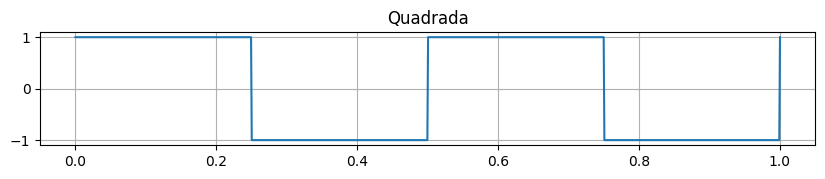

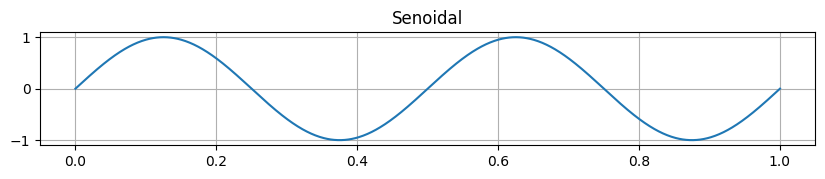

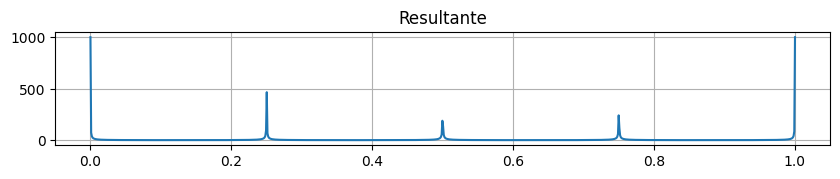

In [ ]:
epsilon = 1e-3

resultado = quadrada1 / (senoidal1 + epsilon)

subplotar(quadrada1, vetorTempo, 'Quadrada', 3, 1)
subplotar(senoidal1, vetorTempo, 'Senoidal', 3, 2)
subplotar(resultado, vetorTempo, 'Resultante', 3, 3)

plt.show()

### Sinal Quadrado / Sinal Triangular

- O problema da divis√£o por zero ainda ocorre quando a onda triangular cruza zero.
- O resultado pode ser um sinal altamente distorcido, com picos abruptos.
  
**Aplica√ß√µes:**

- Implementa√ß√£o de efeitos de √°udio como "crushing" (distor√ß√£o extrema).
- Modula√ß√£o de sinais para produzir oscila√ß√µes ca√≥ticas.

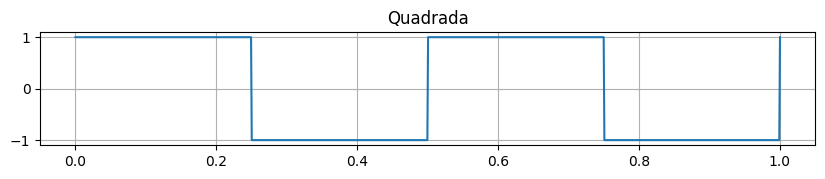

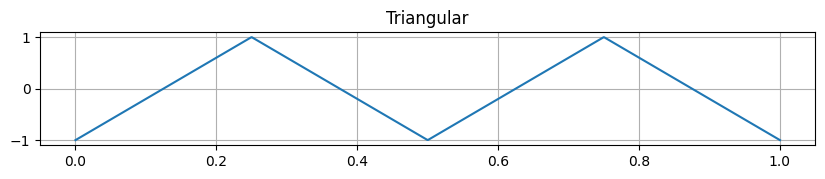

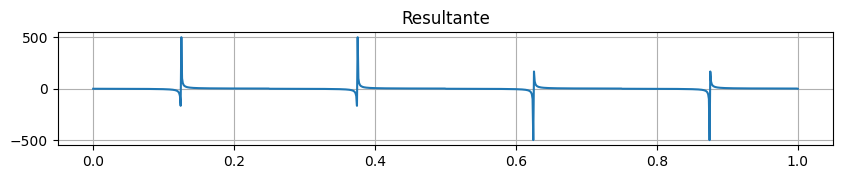

In [ ]:
resultado  = quadrada1 / (s_triang + epsilon)

subplotar(quadrada1, vetorTempo, 'Quadrada', 3, 1)
subplotar(s_triang, vetorTempo, 'Triangular', 3, 2)
subplotar(resultado, vetorTempo, 'Resultante', 3,3)


**Conclus√£o sobre divis√£o de sinais**

- A divis√£o entre sinais √© menos comum do que a multiplica√ß√£o, mas pode ser usada para modula√ß√£o, distor√ß√£o e efeitos n√£o lineares.
- Onda quadrada √∑ outro sinal pode criar distor√ß√µes ou padr√µes de altern√¢ncia.
- Onda triangular √∑ outro sinal suaviza transi√ß√µes, mas pode gerar picos inesperados.
- Ru√≠do branco √∑ outro sinal amplifica varia√ß√µes aleat√≥rias, criando efeitos ca√≥ticos.
- Sempre √© necess√°rio tratar divis√µes por zero para evitar valores infinitos ou explos√µes no sinal.

### Outros conceitos


- **Offset (Deslocamento vertical do sinal)**
    O offset de um sinal √© o deslocamento vertical da onda em rela√ß√£o ao eixo zero (linha base). Em outras palavras, √© um valor constante somado a todo o sinal, movendo-o para cima ou para baixo no eixo da amplitude.


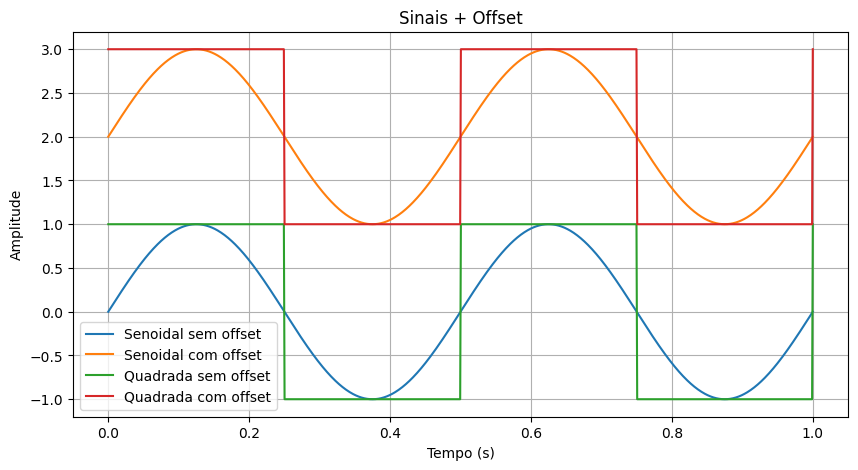

In [ ]:
offset = 2

senoidal_offset = senoidal1 + offset
quadrada_offset = quadrada1 + offset

plotar_sinais(vetorTempo, senoidal1, senoidal_offset, quadrada1, quadrada_offset,
             labels = ['Senoidal sem offset','Senoidal com offset','Quadrada sem offset','Quadrada com offset'],
             titulo = 'Sinais + Offset')

**Isso vale para todas os sinais, s√≥ o desloca para cima**


- **Duty Cycle (para onda quadrada)**  
  - Raz√£o do tempo em que o sinal permanece em n√≠vel alto dentro de um per√≠odo. Se for 0.3 a onda passar√° 30% do tempo no valor 1


---

## üìå 3. Transformando sinais do dom√≠nio do tempo para o dom√≠nio da frequ√™ncia

    Quando analisamos sinais, podemos estud√°-los no dom√≠nio do tempo (como varia√ß√µes ao longo do tempo) ou no dom√≠nio da frequ√™ncia (como a composi√ß√£o de diferentes frequ√™ncias). A Transformada de Fourier e suas variantes permitem fazer essa convers√£o, revelando informa√ß√µes que n√£o s√£o evidentes apenas observando o sinal no tempo.

    
### üîπ 3.1 Transformada de Fourier
        A Transformada de Fourier (TF) √© uma opera√ß√£o matem√°tica que decomp√µe um sinal no tempo em suas componentes de frequ√™ncia. Em outras palavras, ela converte um sinal que varia no tempo em uma soma de senos e cossenos de diferentes frequ√™ncias.

- No dom√≠nio do tempo, analisamos como o sinal varia ao longo do tempo.
- No dom√≠nio da frequ√™ncia, analisamos quais frequ√™ncias comp√µem esse sinal.
  
        A Transformada de Fourier de um sinal ùë•(ùë°) cont√≠nuo √© definida como:

  
$X(f) = \int_{-\infty}^{+\infty} x(t) e^{-j 2\pi f t} dt\$


#### üîπ 3.1.1 Transformada Inversa de Fourier

        A Transformada Inversa de Fourier reconstr√≥i o sinal original a partir das frequ√™ncias constituintes

        A Transformada Inversa de Fourier √© definida como:

$x(t) = \int_{-\infty}^{+\infty} X(f) e^{j 2\pi f t} df\$

### üîπ 3.2 Transformada de Fourier Discreta (DFT)
- Utilizada para sinais discretos e computacionais.

        A DFT de um sinal discreto x[n] de tamanho ùëÅ √© dada por:

 $X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} k n}, \quad k = 0,1,2,\dots,N-1$
  
        A inversa da DFT, usada para reconstruir o sinal original, √© dada por:

$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j \frac{2\pi}{N} k n}, \quad n = 0,1,2,\dots,N-1$


### üîπ 3.3 Transformada R√°pida de Fourier (FFT)
- **A DFT √© computacionalmente cara ùëÇ($ùëÅ^2$) (porque envolve somas e multiplica√ß√µes para cada ponto da sequ√™ncia) por isso usamos a Transformada R√°pida de Fourier (FFT), que reduz a complexidade para O(NlogN).**



- **Por que a FFT acelera o processo?**


      A FFT acelera a DFT ao explorar a recursividade e simetria dos n√∫meros complexos na exponencial de Fourier. O algoritmo divide o problema original em subproblemas menores, resolvendo-os de maneira recursiva e combinando os resultados de forma eficiente.

        Ela se baseia na Decomposi√ß√£o Cooley-Tukey, que divide um sinal de tamanho ùëÅ em duas partes:

1. Amostras de √≠ndices pares
2. Amostras de √≠ndices √≠mpares
   
       Essa divis√£o reduz os c√°lculos de forma exponencial, tornando a FFT extremamente eficiente.

- **Divis√£o Recursiva na FFT**

        Separamos os √≠ndices pares dos impares
$X[k] = X_{\text{par}}[k] + e^{-j \frac{2\pi}{N} k} X_{\text{√≠mpar}}[k]$


- **Pegamos apenas a primeira metade do espectro porque:**

. A segunda metade √© redundante para sinais reais.

. Isso reduz o tamanho dos dados e simplifica a an√°lise.

**EXPLICA√á√ÉO DO DEEPSEEK**

- Explica√ß√£o detalhada:
  
A FFT retorna um array de valores complexos, onde cada valor corresponde a uma componente de frequ√™ncia.

Para um sinal de tamanho N, a FFT retorna N valores.

Esses valores est√£o organizados da seguinte forma:

A primeira metade (0 a N/2‚àí1) corresponde √†s frequ√™ncias positivas.

A segunda metade (N/2 a N‚àí1) corresponde √†s frequ√™ncias negativas.

Para sinais reais, as frequ√™ncias negativas s√£o o complexo conjugado das frequ√™ncias positivas. Portanto, a segunda metade do espectro n√£o traz informa√ß√µes novas.

Exemplo:
Se voc√™ tem um sinal de tamanho N=8, a FFT retornar√° 8 valores. Apenas os primeiros 4 valores (de √≠ndice 0 a 3) s√£o √∫teis para an√°lise, pois os valores de √≠ndice 4 a 7 s√£o sim√©tricos.


In [1]:
# Par√¢metros do sinal
fs = 1000  # Taxa de amostragem (Hz)
T = 1  # Dura√ß√£o (s)
time = np.linspace(0, T, fs, endpoint=False)  # Vetor de tempo

# Criando um sinal composto por duas senoidais de 50Hz e 120Hz
sinal = np.sin(2*np.pi*50* vetorTempo) + np.sin(2*np.pi*120*vetorTempo)

# Aplicando a FFT
N = len(sinal)
frequencias = np.fft.fftfreq(N, d=1/fs)  # Eixo de frequ√™ncia
espectro = np.fft.fft(sinal)  # Aplica√ß√£o da FFT

# Plotando o sinal original
subplotar(sinal = sinal, t = time, nome = 'Sinal no Dom√≠nio do Tempo',qtd_sinais = 2, posicao = 1)


# Plotando o espectro de frequ√™ncia (magnitude da FFT)

subplotar(np.abs(espectro[:N//2]) * (2/N), frequencias[:N//2], 'Espectro de Frequ√™ncia (FFT)', 2, 2) #METADE DO ESPECTRO


NameError: name 'np' is not defined

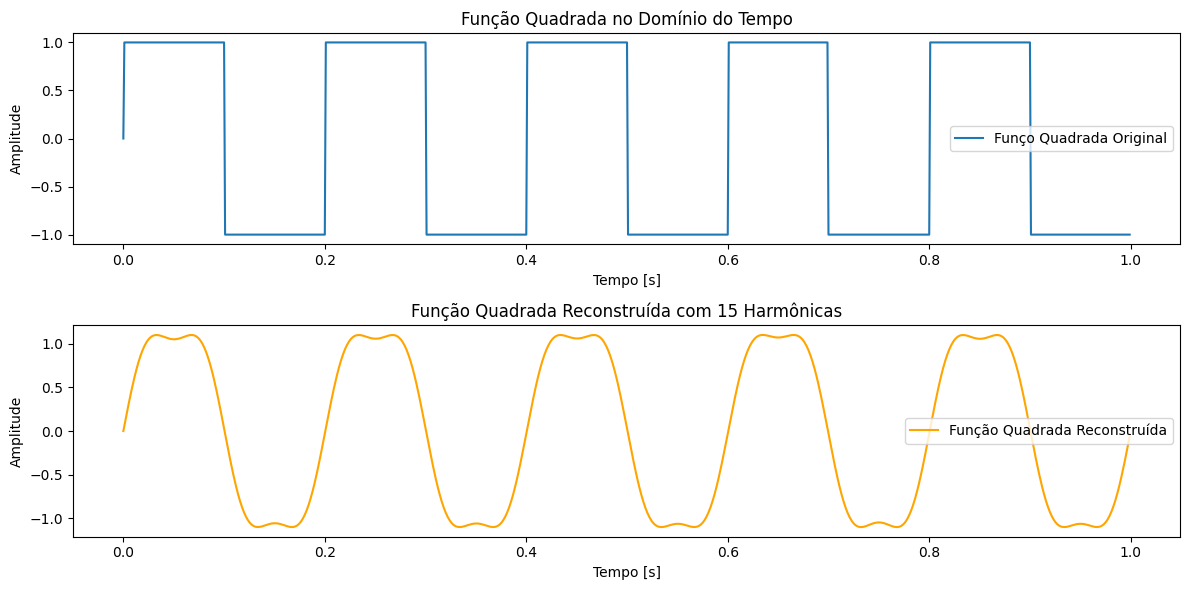

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configura√ß√µes
frequencia_amostragem = 1000  # Taxa de amostragem (1 kHz)
T = 1.0 / frequencia_amostragem  # Per√≠odo de amostragem
t = np.arange(0.0, 1.0, T)  # Vetor de tempo de 0 a 1 segundo

# Criando uma fun√ß√£o quadrada
frequencia = 5  # Frequ√™ncia da fun√ß√£o quadrada (5 Hz)
sinal_tempo = np.sign(np.sin(2 * np.pi * frequencia * t))  # Fun√ß√£o quadrada

# Calculando a Transformada de Fourier
n = len(sinal_tempo)  # N√∫mero de pontos do sinal
fft_resultado = np.fft.fft(sinal_tempo)  # Transformada de Fourier

# Reconstruindo o sinal usando apenas as componentes de frequ√™ncia
# Pegamos apenas as primeiras 'num_harmonicas' frequ√™ncias
num_harmonicas =   15 # N√∫mero de harm√¥nicas para reconstruir o sinal
fft_reconstruido = np.zeros(n, dtype=complex)
fft_reconstruido[:num_harmonicas] = fft_resultado[:num_harmonicas]
fft_reconstruido[-num_harmonicas:] = fft_resultado[-num_harmonicas:]

# Transformada inversa para reconstruir o sinal no dom√≠nio do tempo
sinal_reconstruido = np.fft.ifft(fft_reconstruido).real
# Plotando o sinal original e o sinal reconstru√≠do
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, sinal_tempo, label='Fun√ßo Quadrada Original')
plt.title('Fun√ß√£o Quadrada no Dom√≠nio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, sinal_reconstruido, label='Fun√ß√£o Quadrada Reconstru√≠da', color='orange')
plt.title(f'Fun√ß√£o Quadrada Reconstru√≠da com {num_harmonicas} Harm√¥nicas')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

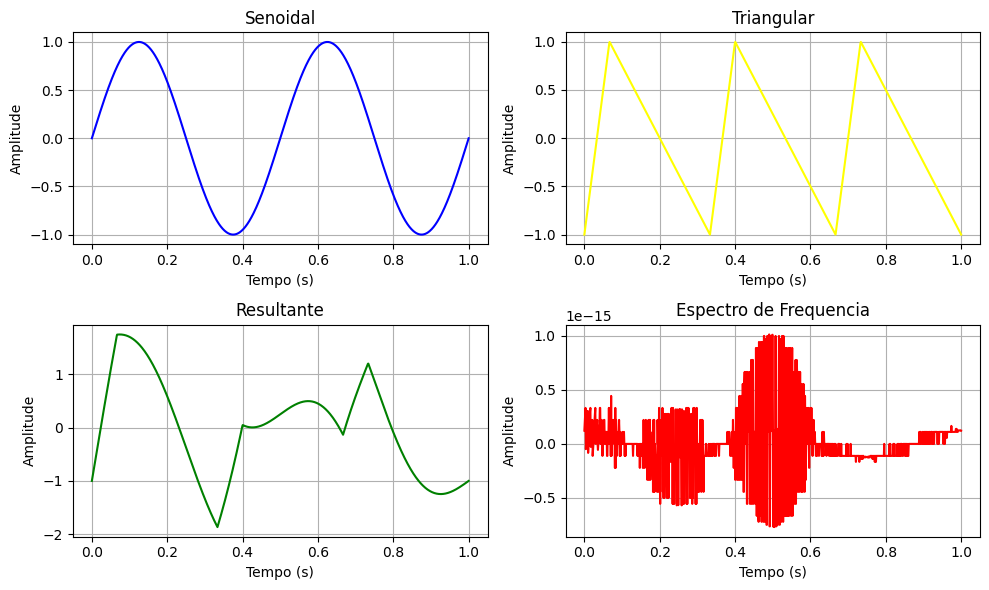

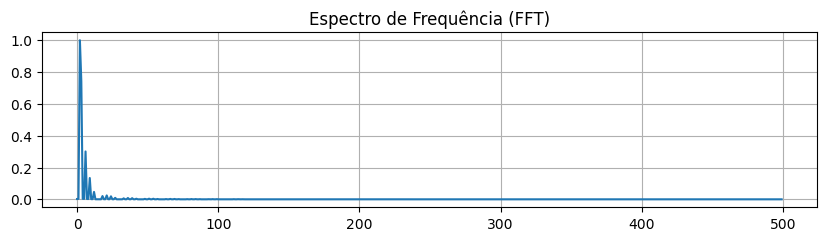

In [ ]:
resultante = senoidal1 + x_triang

# Aplicando a FFT
N = len(resultante)
frequencias = np.fft.fftfreq(N, d=1/fs)  # Eixo de frequ√™ncia
espectro = np.fft.fft(resultante)  # Aplica√ß√£o da FFT



plotar_2x2(senoidal1, x_triang, resultante, interferenciaDestrutiva, vetorTempo,
          labels = ['Senoidal','Triangular','Resultante','Espectro de Frequencia'])

subplotar(np.abs(espectro[:N//2]) * (2/N), frequencias[:N//2], 'Espectro de Frequ√™ncia (FFT)', 2, 2) #METADE DO ESPECTRO